In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

# Questão 6.3

In [2]:
xls = 'ex6.3.xlsx'
url = 'https://docs.google.com/spreadsheets/d/1_-grWZfyvCxzKkHHA40BaEiGeA3dRosmdtGnBM8tmo0/edit?usp=sharing'
df6_3 = pd.read_excel(xls)
attr = list(df6_3)
print(attr)

['Escola', 'Média']


### II) Estime $\alpha$ e $\beta$ pelo método de mínimos quadrados. Obtenha também uma estimativa de $\sigma^2$

#### Estendendo o DataFrame:

In [3]:
df6_3['x'] = np.where(df6_3['Escola'] == 'Particular', 1, -1)
df6_3['x_mean'] = df6_3['x'].mean()
df6_3['y'] = df6_3['Média']
df6_3['y_mean'] = df6_3['y'].mean()
df6_3['(x-x_mean)(y-y_mean)'] = (df6_3['x']-df6_3['x_mean']) * (df6_3['y']-df6_3['y_mean'])
df6_3['(x-x_mean)^2'] = (df6_3['x']-df6_3['x_mean']) * (df6_3['x']-df6_3['x_mean'])
df6_3

Escola  Média  x  x_mean    y    y_mean  (x-x_mean)(y-y_mean)  \
0   Particular    8.6  1     0.0  8.6  6.855556              1.744444   
1   Particular    8.6  1     0.0  8.6  6.855556              1.744444   
2   Particular    7.8  1     0.0  7.8  6.855556              0.944444   
3   Particular    6.5  1     0.0  6.5  6.855556             -0.355556   
4   Particular    7.2  1     0.0  7.2  6.855556              0.344444   
5   Particular    6.6  1     0.0  6.6  6.855556             -0.255556   
6   Particular    5.6  1     0.0  5.6  6.855556             -1.255556   
7   Particular    5.5  1     0.0  5.5  6.855556             -1.355556   
8   Particular    8.2  1     0.0  8.2  6.855556              1.344444   
9      Pública    5.8 -1     0.0  5.8  6.855556              1.055556   
10     Pública    7.6 -1     0.0  7.6  6.855556             -0.744444   
11     Pública    8.0 -1     0.0  8.0  6.855556             -1.144444   
12     Pública    6.2 -1     0.0  6.2  6.855556              0.655556   
13     Pública    7.6 -1     0.0  7.6  6.855556             -0.744444   
14     Pública    6.5 -1     0.0  6.5  6.855556              0.355556   
15     Pública    5.6 -1     0.0  5.6  6.855556              1.255556   
16     Pública    5.7 -1     0.0  5.7  6.855556              1.155556   
17     Pública    5.8 -1     0.0  5.8  6.855556              1.055556   

    (x-x_mean)^2  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  
5            1.0  
6            1.0  
7            1.0  
8            1.0  
9            1.0  
10           1.0  
11           1.0  
12           1.0  
13           1.0  
14           1.0  
15           1.0  
16           1.0  
17           1.0

#### Estatísticas Descritivas:

In [4]:
df6_3.describe()

Média          x  x_mean          y     y_mean  \
count  18.000000  18.000000    18.0  18.000000  18.000000   
mean    6.855556   0.000000     0.0   6.855556   6.855556   
std     1.101455   1.028992     0.0   1.101455   0.000000   
min     5.500000  -1.000000     0.0   5.500000   6.855556   
25%     5.800000  -1.000000     0.0   5.800000   6.855556   
50%     6.550000   0.000000     0.0   6.550000   6.855556   
75%     7.750000   1.000000     0.0   7.750000   6.855556   
max     8.600000   1.000000     0.0   8.600000   6.855556   

       (x-x_mean)(y-y_mean)  (x-x_mean)^2  
count             18.000000          18.0  
mean               0.322222           1.0  
std                1.050366           0.0  
min               -1.355556           1.0  
25%               -0.647222           1.0  
50%                0.505556           1.0  
75%                1.130556           1.0  
max                1.744444           1.0

#### Estimando $\beta$: 

$$
\hat{\beta} = \frac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_i-\bar{x})^2}
$$

In [5]:
beta = df6_3['(x-x_mean)(y-y_mean)'].sum() / df6_3['(x-x_mean)^2'].sum()
beta

0.3222222222222222

#### Estimando $\alpha$:

$$
\hat{\alpha}=\bar{y}-\hat{\beta}\bar{x}
$$

In [6]:
alpha = df6_3['y'].mean() - beta * df6_3['x'].mean()
alpha

6.855555555555555

#### Estimando $\sigma^2$:

$
Q(\hat{\alpha}, \hat{\beta}) = \sum_{i=1}^{n}(y_i-\hat{\alpha}-\hat{\beta}x_i)^2
$

$
S^2=\frac{1}{n-2}Q(\hat{\alpha}, \hat{\beta})
$

In [7]:
residual = df6_3['y'] - alpha - beta * df6_3['x']
SQE = (residual * residual).sum()
s2 = SQE / (df6_3['y'].size - 2)
s2

1.172222222222222

#### Usando biblioteca pronta:

In [8]:
results = ols('y ~ x', data=df6_3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.594
Date:                Wed, 29 May 2019   Prob (F-statistic):              0.225
Time:                        19:50:19   Log-Likelihood:                -25.911
No. Observations:                  18   AIC:                             55.82
Df Residuals:                      16   BIC:                             57.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8556      0.255     26.864      0.0

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


#### Calculando $S^2:$

In [9]:
results.scale

1.172222222222222

#### Gráfico da Regressão

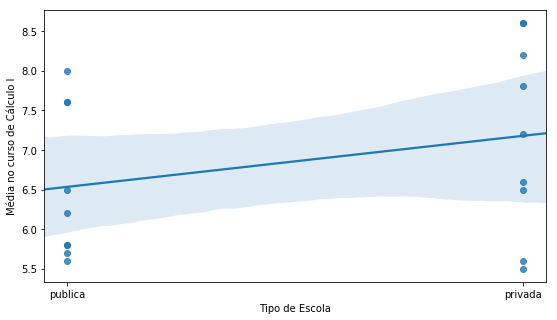

In [10]:
plt.figure(figsize=(9, 5))
ax = sns.regplot(x='x', y='y', data=df6_3, ci=95)
ax.set_xticks([-1, 1])
ax.set_xticklabels(['publica', 'privada'])
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Média no curso de Cálculo I')
plt.show()

### III) Avalie a qualidade do ajuste do modelo por meio de técnicas de diagnóstico.

#### Utilizando a distância de Cook como medida de diagnóstico:

In [11]:
influence = results.get_influence()
(c, p) = influence.cooks_distance
c

array([1.21327014e-01, 1.21327014e-01, 2.32227488e-02, 2.75547986e-02,
       2.96208531e-05, 2.00236967e-02, 1.49318720e-01, 1.68846268e-01,
       6.26777251e-02, 3.22571090e-02, 6.82464455e-02, 1.29028436e-01,
       6.66469194e-03, 6.82464455e-02, 6.66469194e-05, 5.22511848e-02,
       4.16543246e-02, 3.22571090e-02])

#### Gráfico de Cook

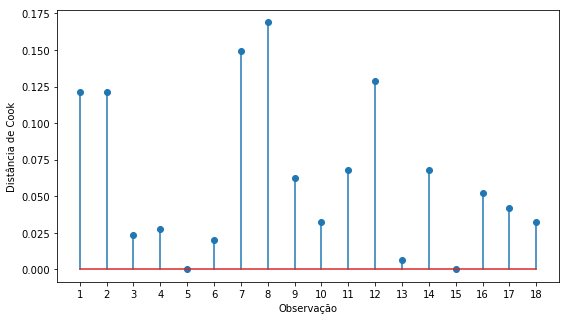

In [12]:
sample = np.arange(1, len(c)+1, 1)
plt.figure(figsize=(9, 5))
plt.xlabel('Observação')
plt.ylabel('Distância de Cook')
plt.xticks(sample)
plt.stem(sample, c)
plt.show()

#### Utilizando gráfico de resíduos como medida de diagnóstico:

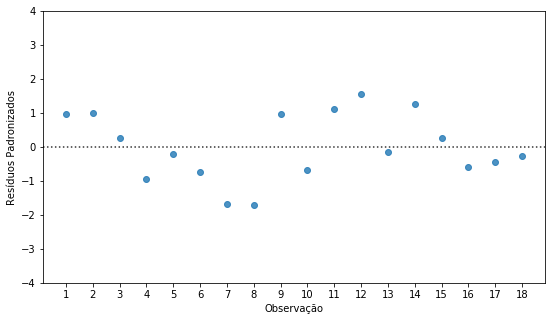

In [13]:
residual = influence.resid_studentized_internal
scale = range(-4, 5)

plt.figure(figsize=(9, 5))
sns.residplot(sample, residual)
plt.xlabel('Observação')
plt.ylabel('Resíduos Padronizados')
plt.xticks(sample)
plt.yticks(scale)
plt.show()

### IV) Construa intervalos de confiança para $\alpha$ e $\beta$

In [14]:
results.conf_int(alpha=0.05)

0         1
Intercept  6.314571  7.396541
x         -0.218763  0.863207

### V) Com base nas estimativas obtidas no item ii), construa intervalos de confiança para os valores esperados das notas dos alunos das escolas particulares e públicas

In [15]:
import math
stat = df6_3.groupby(['Escola'])['Média'].agg(['mean', 'count', 'std'])
print(stat)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stat.index:
    m, c, s = stat.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stat['ci95_hi'] = ci95_hi
stat['ci95_lo'] = ci95_lo
print(stat)

                mean  count       std
Escola                               
Particular  7.177778      9  1.202890
Pública     6.533333      9  0.947365
------------------------------
                mean  count       std   ci95_hi   ci95_lo
Escola                                                   
Particular  7.177778      9  1.202890  7.963666  6.391890
Pública     6.533333      9  0.947365  7.152278  5.914388


### VI) Ainda utilizando o modelo proposto, especifique e teste a hipótese de que ambos os valores esperados são iguais

In [16]:
public = df6_3[df6_3['Escola'] == 'Pública']['y']
private = df6_3[df6_3['Escola'] == 'Particular']['y']
(t, p) = stats.ttest_ind(public, private)
t

-1.2626609981339125

### VII) Repita os itens i)-vi) definindo x<sub>i</sub> = 1 se o aluno cursou escola particular e xi = 0 se o aluno cursou escola pública, i = 1, . . . , 18

#### Atualizando o DataFrame

In [17]:
df6_3['x'] = np.where(df6_3['Escola'] == 'Particular', 1, 0)
df6_3['x_mean'] = df6_3['x'].mean()
df6_3['y'] = df6_3['Média']
df6_3['y_mean'] = df6_3['y'].mean()
df6_3['(x-x_mean)(y-y_mean)'] = (df6_3['x']-df6_3['x_mean']) * (df6_3['y']-df6_3['y_mean'])
df6_3['(x-x_mean)^2'] = (df6_3['x']-df6_3['x_mean']) * (df6_3['x']-df6_3['x_mean'])
df6_3

Escola  Média  x  x_mean    y    y_mean  (x-x_mean)(y-y_mean)  \
0   Particular    8.6  1     0.5  8.6  6.855556              0.872222   
1   Particular    8.6  1     0.5  8.6  6.855556              0.872222   
2   Particular    7.8  1     0.5  7.8  6.855556              0.472222   
3   Particular    6.5  1     0.5  6.5  6.855556             -0.177778   
4   Particular    7.2  1     0.5  7.2  6.855556              0.172222   
5   Particular    6.6  1     0.5  6.6  6.855556             -0.127778   
6   Particular    5.6  1     0.5  5.6  6.855556             -0.627778   
7   Particular    5.5  1     0.5  5.5  6.855556             -0.677778   
8   Particular    8.2  1     0.5  8.2  6.855556              0.672222   
9      Pública    5.8  0     0.5  5.8  6.855556              0.527778   
10     Pública    7.6  0     0.5  7.6  6.855556             -0.372222   
11     Pública    8.0  0     0.5  8.0  6.855556             -0.572222   
12     Pública    6.2  0     0.5  6.2  6.855556              0.327778   
13     Pública    7.6  0     0.5  7.6  6.855556             -0.372222   
14     Pública    6.5  0     0.5  6.5  6.855556              0.177778   
15     Pública    5.6  0     0.5  5.6  6.855556              0.627778   
16     Pública    5.7  0     0.5  5.7  6.855556              0.577778   
17     Pública    5.8  0     0.5  5.8  6.855556              0.527778   

    (x-x_mean)^2  
0           0.25  
1           0.25  
2           0.25  
3           0.25  
4           0.25  
5           0.25  
6           0.25  
7           0.25  
8           0.25  
9           0.25  
10          0.25  
11          0.25  
12          0.25  
13          0.25  
14          0.25  
15          0.25  
16          0.25  
17          0.25

#### Resultado da Regressão:

In [18]:
results = ols('y ~ x', data=df6_3).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     1.594
Date:                Wed, 29 May 2019   Prob (F-statistic):              0.225
Time:                        19:50:20   Log-Likelihood:                -25.911
No. Observations:                  18   AIC:                             55.82
Df Residuals:                      16   BIC:                             57.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5333      0.361     18.103      0.0

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


#### Variância amostral $S^2:$

In [19]:
results.scale

1.1722222222222218

#### Gráfico da Regressão

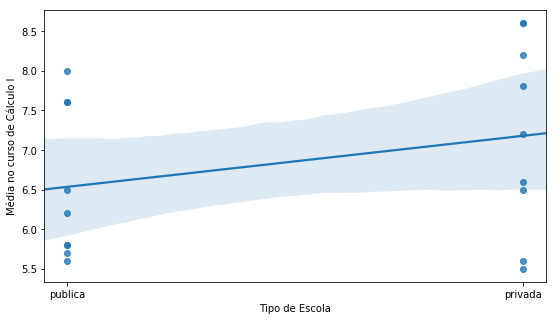

In [20]:
plt.figure(figsize=(9, 5))
ax = sns.regplot(x='x', y='y', data=df6_3, ci=95)
ax.set_xticks([0, 1])
ax.set_xticklabels(['publica', 'privada'])
ax.set_xlabel('Tipo de Escola')
ax.set_ylabel('Média no curso de Cálculo I')
plt.show()

#### Usando a distância de Cook como medida de diagnóstico:

In [21]:
influence = results.get_influence()
(c, p) = influence.cooks_distance
c

array([1.21327014e-01, 1.21327014e-01, 2.32227488e-02, 2.75547986e-02,
       2.96208531e-05, 2.00236967e-02, 1.49318720e-01, 1.68846268e-01,
       6.26777251e-02, 3.22571090e-02, 6.82464455e-02, 1.29028436e-01,
       6.66469194e-03, 6.82464455e-02, 6.66469194e-05, 5.22511848e-02,
       4.16543246e-02, 3.22571090e-02])

#### Gráfico de Cook:

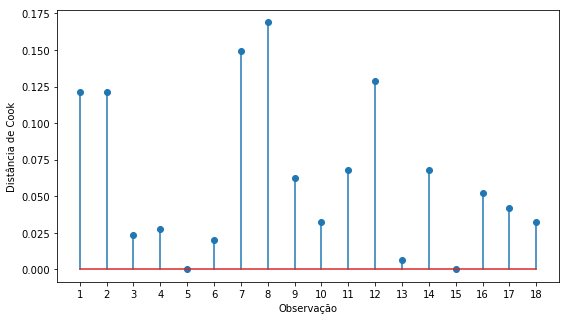

In [22]:
index = np.arange(1, c.size+1, 1)
plt.figure(figsize=(9, 5))
plt.xticks(index)
plt.xlabel('Observação')
plt.ylabel('Distância de Cook')
plt.stem(index, c)
plt.show()

#### Utilizando o gráfico de resíduos como medida de diagnóstico:

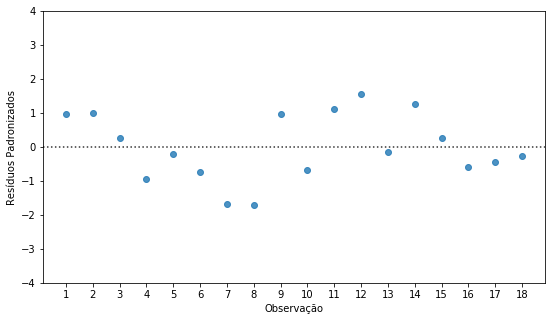

In [23]:
residual = influence.resid_studentized_internal
plt.figure(figsize=(9, 5))
sns.residplot(sample, residual)
plt.xlabel('Observação')
plt.ylabel('Resíduos Padronizados')
plt.xticks(sample)
plt.yticks(scale)
plt.show()

#### Intervalos de confiança para $\alpha$ e $\beta$

In [24]:
results.conf_int(alpha=0.05)

0         1
Intercept  5.768265  7.298402
x         -0.437525  1.726414

#### Intervalos de confiança sem levar em conta os estimadores:

In [25]:
stat = df6_3.groupby(['Escola'])['Média'].agg(['mean', 'count', 'std'])
print(stat)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stat.index:
    m, c, s = stat.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stat['ci95_hi'] = ci95_hi
stat['ci95_lo'] = ci95_lo
print(stat)

                mean  count       std
Escola                               
Particular  7.177778      9  1.202890
Pública     6.533333      9  0.947365
------------------------------
                mean  count       std   ci95_hi   ci95_lo
Escola                                                   
Particular  7.177778      9  1.202890  7.963666  6.391890
Pública     6.533333      9  0.947365  7.152278  5.914388


# Questão 6.4

In [26]:
xls = 'ex6.4.xlsx'
url = 'https://docs.google.com/spreadsheets/d/1yQPzBaK8GuV3WC9fMw1qqRwbXO0qHX-pyxTRugoPdeo/edit?usp=sharing'
df6_4 = pd.read_excel(xls)
attr6_4 = list(df6_4)
attr6_4

['Volume USG (cm³)', 'Peso real (g)']

#### Visualizando o DataFrame:

In [27]:
df6_4

Volume USG (cm³)  Peso real (g)
0                656            630
1                692            745
2                588            690
3                799            890
4                766            825
5                800            960
6                693            835
7                602            570
8                737            705
9                921            955
10               923            990
11               945            725
12               816            840
13               584            640
14               642            740
15               970            945

**Calculando Médias**

In [28]:
volume = df6_4[attr6_4[0]]
weight = df6_4[attr6_4[1]]
volume_avg = volume.mean()
weight_avg = weight.mean()
print(volume_avg, weight_avg)

758.375 792.8125


**Gráfico de dispersão**

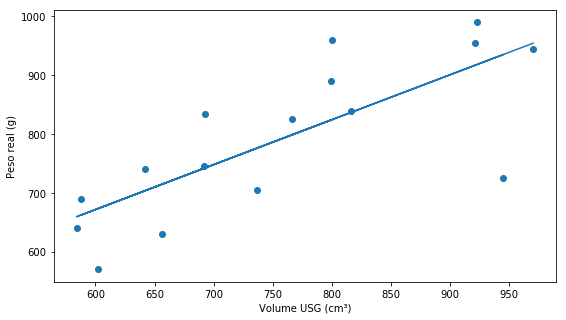

In [29]:
plt.figure(figsize=(9, 5))
plt.scatter(volume, weight)
line_data = np.polyfit(volume, weight, deg=1)
trend_line = np.poly1d(line_data)
plt.plot(volume, trend_line(volume))
plt.xlabel(attr6_4[0])
plt.ylabel(attr6_4[1])
plt.show()

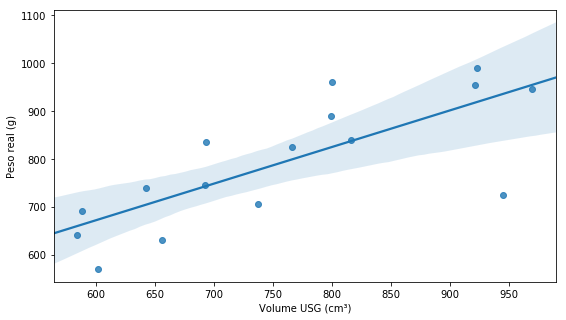

In [30]:
plt.figure(figsize=(9, 5))
ax = sns.regplot(x='Volume USG (cm³)', y='Peso real (g)', data=df6_4, ci=95)

**Estimadores**

In [31]:
beta_calc = ((volume - volume_avg)*(weight - weight_avg)).sum()/((weight - weight_avg)**2).sum()
print('Beta = ', beta_calc)
alpha_calc = weight_avg - beta_calc*volume_avg
print('Alpha = ', alpha_calc)

Beta =  0.7604039230634261
Alpha =  216.14117484677422


**OLS do SM**

In [32]:
volume_sm = sm.add_constant(volume)
model6_4 = sm.OLS(weight, volume_sm)
results6_4 = model6_4.fit()
print(results6_4.summary())
print(results6_4.params)

                            OLS Regression Results                            
Dep. Variable:          Peso real (g)   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     19.42
Date:                Wed, 29 May 2019   Prob (F-statistic):           0.000597
Time:                        19:50:22   Log-Likelihood:                -93.255
No. Observations:                  16   AIC:                             190.5
Df Residuals:                      14   BIC:                             192.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              213.2762    133.333  

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#### Variância amostral S<sup>2</sup>:

In [33]:
results6_4.scale

7727.405471300418

**Qualidade do Ajuste**

#### Gráfico de Cook:

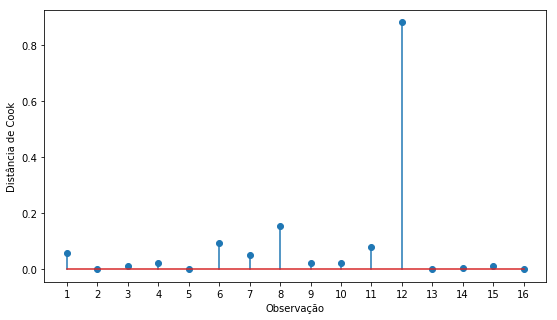

In [34]:
influence6_4 = results6_4.get_influence()
(c6_4, p6_4) = influence6_4.cooks_distance
index6_4 = np.arange(1, c6_4.size+1, 1)
plt.figure(figsize=(9, 5))
plt.xticks(index6_4)
plt.xlabel('Observação')
plt.ylabel('Distância de Cook')
plt.stem(index6_4, c6_4)
plt.show()

#### Gráfico de Resíduos:

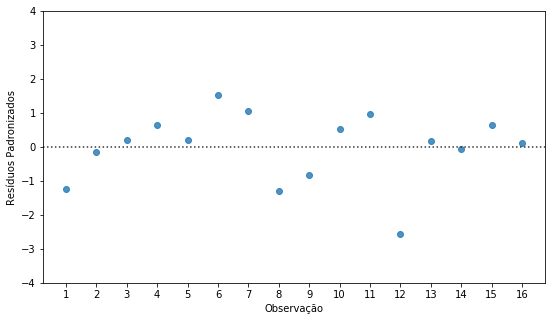

In [35]:
residual6_4 = influence6_4.resid_studentized_internal
plt.figure(figsize=(9, 5))
sns.residplot(index6_4, residual6_4)
plt.xlabel('Observação')
plt.ylabel('Resíduos Padronizados')
plt.xticks(index6_4)
plt.yticks(scale)
plt.show()

#### Gráfico QQ:

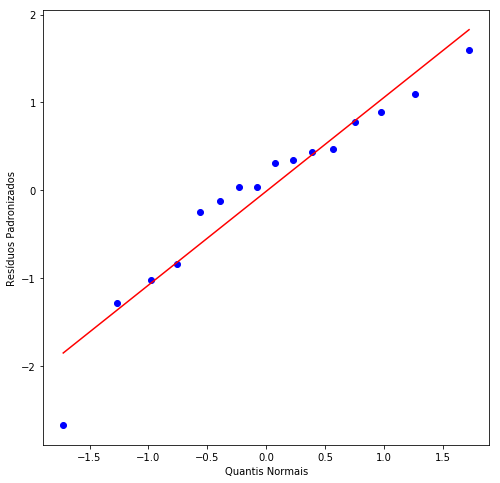

In [36]:
plt.figure(figsize=(8, 8))
stats.probplot(residual6_4, plot=plt)
plt.xlabel('Quantis Normais')
plt.ylabel('Resíduos Padronizados')
plt.title('')
plt.show()

### V) Construa uma tabela com intervalos de confiança para o peso esperado do lobo direito do fígado correspondentes a volumes (estimados ultrassonograficamente) de 600, 700, 800, 900 e 1000 cm3

#### Criando um DataFrame para cálculo do Intervalo de Confiança:

In [37]:
ic_df6_4 = pd.DataFrame([600, 700, 800, 900, 1000])
ic_df6_4.columns = ['Volume USG (cm³)']
ic_df6_4

Volume USG (cm³)
0               600
1               700
2               800
3               900
4              1000

In [38]:
alpha, beta = results6_4.params
S_2 = results.scale
ic_df6_4['Peso estimado (g)'] = alpha + beta * ic_df6_4['Volume USG (cm³)']
ic_df6_4

Volume USG (cm³)  Peso estimado (g)
0               600         671.785213
1               700         748.203390
2               800         824.621566
3               900         901.039742
4              1000         977.457919

#### Calculando o erro padrão:

In [39]:
std_error6_4 = 1.96 * np.sqrt(S_2/14)
std_error6_4

0.567148814490322

#### Calculando o Intervalo de Confiança:

In [40]:
ic_df6_4['ic-'] = ic_df6_4['Peso estimado (g)'] - std_error6_4
ic_df6_4['ic+'] = ic_df6_4['Peso estimado (g)'] + std_error6_4
ic_df6_4

Volume USG (cm³)  Peso estimado (g)         ic-         ic+
0               600         671.785213  671.218064  672.352362
1               700         748.203390  747.636241  748.770538
2               800         824.621566  824.054417  825.188715
3               900         901.039742  900.472593  901.606891
4              1000         977.457919  976.890770  978.025067

### VI) Repita os itens anteriores considerando um modelo linear simples sem intercepto

#### OLS do SM sem intercepto:

In [41]:
results6_4si = sm.OLS(df6_4['Peso real (g)'], df6_4['Volume USG (cm³)']).fit()
print(results6_4si.summary())
print(results6_4si.params)

                            OLS Regression Results                            
Dep. Variable:          Peso real (g)   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1194.
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.03e-15
Time:                        19:50:23   Log-Likelihood:                -94.598
No. Observations:                  16   AIC:                             191.2
Df Residuals:                      15   BIC:                             192.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Volume USG (cm³)     1.0378      0.030  

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


#### Variância amostral S<sup>2</sup>:

In [99]:
results6_4si.scale

8530.34756781851

#### Gerando gráfico de dispersão através do modelo sem Intercepto:

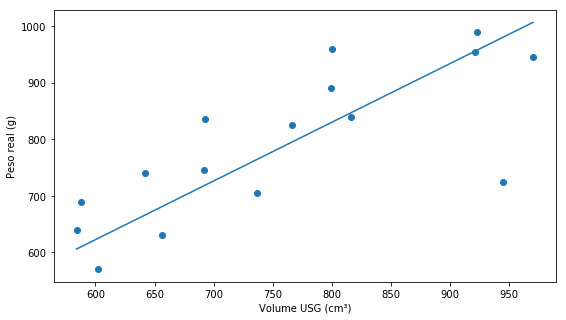

In [100]:
samples = np.arange(min(df6_4['Volume USG (cm³)']), max(df6_4['Volume USG (cm³)']), 0.01)
predict6_4si = results6_4si.predict(samples)

plt.figure(figsize=(9, 5))
plt.scatter(df6_4['Volume USG (cm³)'], df6_4['Peso real (g)'])
plt.plot(samples, predict6_4si)
plt.xlabel(attr6_4[0])
plt.ylabel(attr6_4[1])
plt.show()

#### Qualidade do ajuste:

#### Gráfico de Cook:

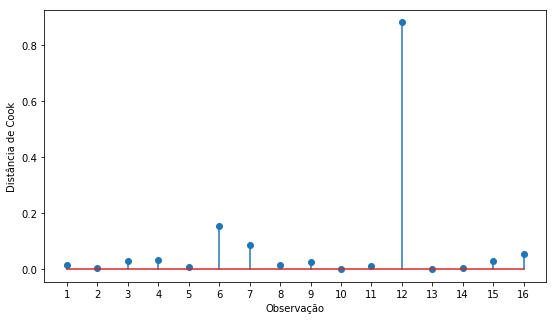

In [101]:
influence6_4si = results6_4si.get_influence()
(c6_4, p6_4) = influence6_4si.cooks_distance
index6_4 = np.arange(1, c6_4.size+1, 1)
plt.figure(figsize=(9, 5))
plt.xticks(index6_4)
plt.xlabel('Observação')
plt.ylabel('Distância de Cook')
plt.stem(index6_4, c6_4)
plt.show()

#### Gráfico de Resíduos:

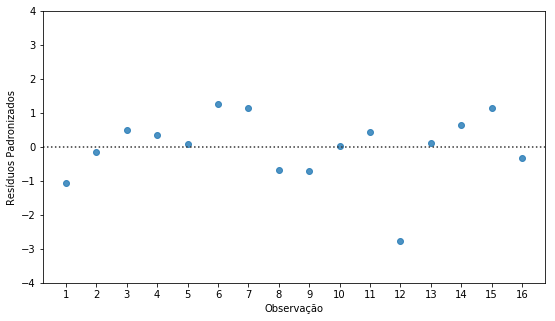

In [102]:
residual6_4si = influence6_4si.resid_studentized_internal
plt.figure(figsize=(9, 5))
sns.residplot(index6_4, residual6_4si)
plt.xlabel('Observação')
plt.ylabel('Resíduos Padronizados')
plt.xticks(index6_4)
plt.yticks(scale)
plt.show()

#### Gráfico QQ:

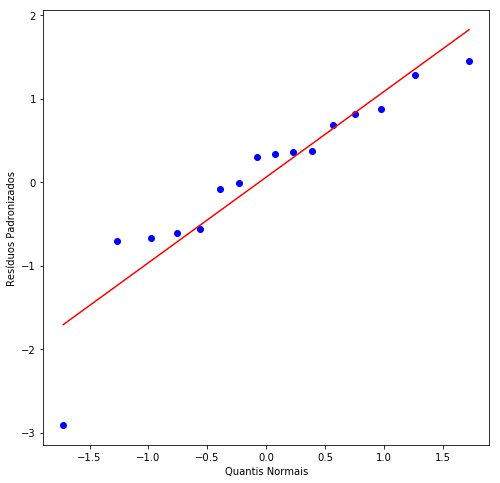

In [103]:
plt.figure(figsize=(8, 8))
stats.probplot(residual6_4si, plot=plt)
plt.xlabel('Quantis Normais')
plt.ylabel('Resíduos Padronizados')
plt.title('')
plt.show()

# Questão 6.5

In [45]:
xls = 'ex6.5.xlsx'
url = 'https://docs.google.com/spreadsheets/d/10h09zsrCQSinjyELHg7nx_J4jQLiSwTNygc5ozJMqDc/edit?usp=sharing'
df6_5 = pd.read_excel(xls)
attr = list(df6_5)
print(attr)

['Imóvel', 'Área (m²)', 'Preço (R$)']


In [46]:
df6_5

Imóvel  Área (m²)  Preço (R$)
0        1        128       10000
1        2        125        9000
2        3        200       17000
3        4       4000      200000
4        5        258       25000
5        6        360       40000
6        7        896       70000
7        8        400       25000
8        9        352       35000
9       10        250       27000
10      11        135       11000
11      12       6492      120000
12      13       1040       35000
13      14       3000      300000

### I) Construa um gráfico de dispersão apropriado para o problema.

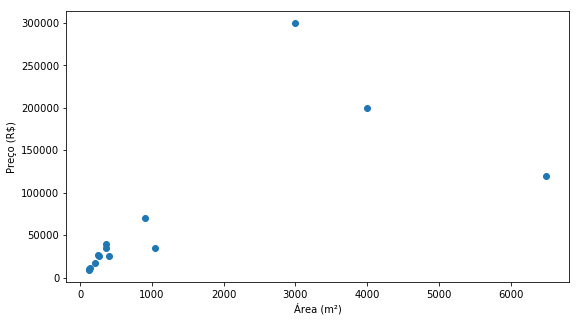

In [47]:
plt.figure(figsize=(9,5))
plt.scatter(df6_5['Área (m²)'], df6_5['Preço (R$)'])
plt.xlabel('Área (m²)')
plt.ylabel('Preço (R$)')
plt.show()

### II) Ajuste um modelo de regressão linear simples e avalie a qualidade do ajuste (obtenha estimativas dos parâmetros e de seus erros padrões, calcule o coeficiente de determinação e construa gráficos de resíduos e um gráfico do tipo QQ).

#### Estendendo o DataFrame:

In [48]:
df6_5['y'] = df6_5['Preço (R$)']
df6_5['x'] = df6_5['Área (m²)']
df6_5

Imóvel  Área (m²)  Preço (R$)       y     x
0        1        128       10000   10000   128
1        2        125        9000    9000   125
2        3        200       17000   17000   200
3        4       4000      200000  200000  4000
4        5        258       25000   25000   258
5        6        360       40000   40000   360
6        7        896       70000   70000   896
7        8        400       25000   25000   400
8        9        352       35000   35000   352
9       10        250       27000   27000   250
10      11        135       11000   11000   135
11      12       6492      120000  120000  6492
12      13       1040       35000   35000  1040
13      14       3000      300000  300000  3000

In [49]:
results = ols('y ~ x', data=df6_5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     11.11
Date:                Wed, 29 May 2019   Prob (F-statistic):            0.00597
Time:                        19:50:24   Log-Likelihood:                -173.74
No. Observations:                  14   AIC:                             351.5
Df Residuals:                      12   BIC:                             352.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.693e+04   2.08e+04      1.298      0.2

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


#### Variância amostral S<sup>2</sup>:

In [50]:
results.scale

4108841273.208629

#### Gráfico de Regressão:

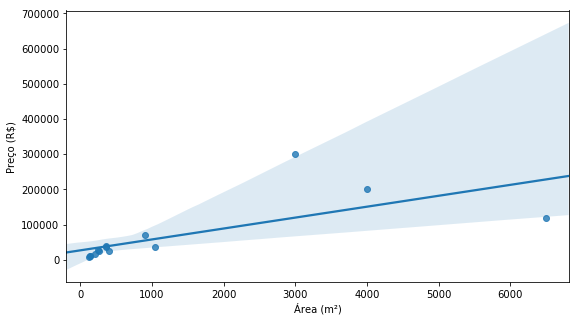

In [51]:
plt.figure(figsize=(9, 5))
ax = sns.regplot(x='x', y='y', data=df6_5)
ax.set_xlabel('Área (m²)')
ax.set_ylabel('Preço (R$)')
plt.show()

#### Gráfico de Resíduos

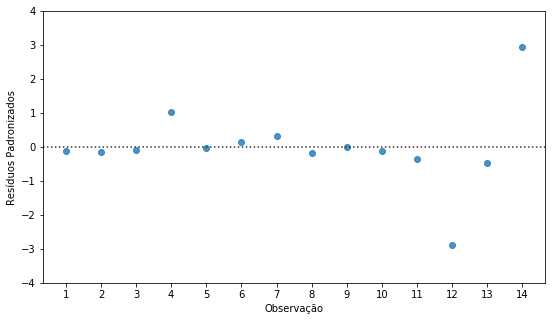

In [52]:
residual = results.get_influence().resid_studentized_internal
sample = np.arange(1, len(df6_5)+1, 1)

plt.figure(figsize=(9, 5))
sns.residplot(sample, residual)
plt.xlabel('Observação')
plt.ylabel('Resíduos Padronizados')
plt.xticks(sample)
plt.yticks(scale)
plt.show()

#### Gráfico QQ:

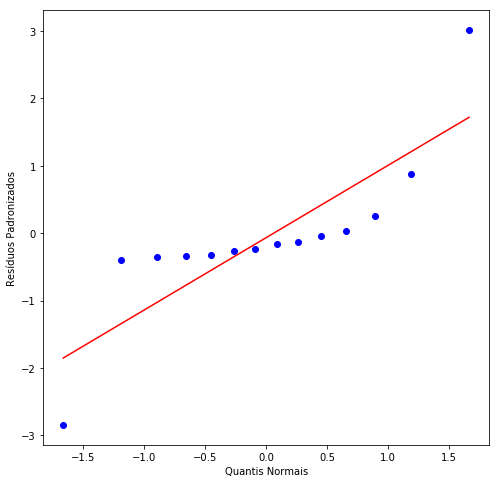

In [53]:
plt.figure(figsize=(8, 8))
stats.probplot(residual, plot=plt)
plt.xlabel('Quantis Normais')
plt.ylabel('Resíduos Padronizados')
plt.title('')
plt.show()

### III) Ajuste o modelo linearizável (por meio de uma transformação logarítmica) $y=\beta x^{\gamma}e$

#### Atualizando o DataFrame:

In [54]:
df6_5['y_star'] = np.log(df6_5['y'])
df6_5['x_star'] = np.log(df6_5['x'])
df6_5

Imóvel  Área (m²)  Preço (R$)       y     x     y_star    x_star
0        1        128       10000   10000   128   9.210340  4.852030
1        2        125        9000    9000   125   9.104980  4.828314
2        3        200       17000   17000   200   9.740969  5.298317
3        4       4000      200000  200000  4000  12.206073  8.294050
4        5        258       25000   25000   258  10.126631  5.552960
5        6        360       40000   40000   360  10.596635  5.886104
6        7        896       70000   70000   896  11.156251  6.797940
7        8        400       25000   25000   400  10.126631  5.991465
8        9        352       35000   35000   352  10.463103  5.863631
9       10        250       27000   27000   250  10.203592  5.521461
10      11        135       11000   11000   135   9.305651  4.905275
11      12       6492      120000  120000  6492  11.695247  8.778326
12      13       1040       35000   35000  1040  10.463103  6.946976
13      14       3000      300000  300000  3000  12.611538  8.006368

In [55]:
results = ols('y_star ~ x_star', data=df6_5).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 y_star   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     77.50
Date:                Wed, 29 May 2019   Prob (F-statistic):           1.39e-06
Time:                        19:50:25   Log-Likelihood:                -6.3844
No. Observations:                  14   AIC:                             16.77
Df Residuals:                      12   BIC:                             18.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7158      0.555     10.306      0.0

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


#### Variância amostral S<sup>2</sup>:

In [56]:
results.scale

0.17004901828644559

#### Gráfico de Regressão:

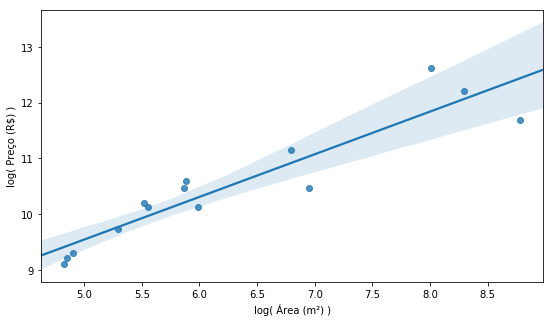

In [57]:
plt.figure(figsize=(9, 5))
ax = sns.regplot(x='x_star', y='y_star', data=df6_5, ci=95)
ax.set_xlabel('log( Área (m²) )')
ax.set_ylabel('log( Preço (R$) )')
plt.show()

#### Estimativas:

In [58]:
(beta_star, gamma) = results.params
beta_star, gamma

(5.715826412100477, 0.7653874759899679)

#### Gráfico de Resíduos:

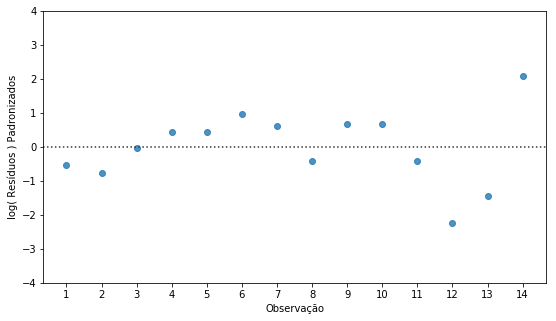

In [59]:
residual_star = results.get_influence().resid_studentized_internal
plt.figure(figsize=(9, 5))
sns.residplot(sample, residual_star)
plt.xlabel('Observação')
plt.ylabel('log( Resíduos ) Padronizados')
plt.xticks(sample)
plt.yticks(scale)
plt.show()

#### Gráfico QQ:

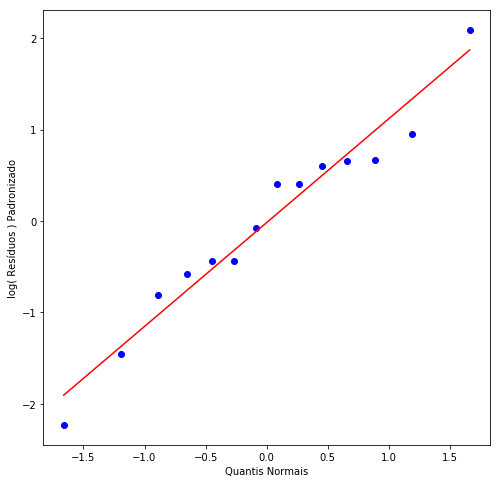

In [60]:
plt.figure(figsize=(8, 8))
stats.probplot(residual_star, plot=plt)
plt.xlabel('Quantis Normais')
plt.ylabel('log( Resíduos ) Padronizado')
plt.title('')
plt.show()

### IV) Utilizando o modelo com o melhor ajuste, construa intervalos de confiança com coeficiente de confiança (aproximado) de 95% para os preços esperados de imóveis com 200m<sup>2</sup>, 500m<sup>2</sup> e 1000m<sup>2</sup>

#### Criando um DataFrame separado para cálculo do Intervalo de Confiança:

In [61]:
ic_df = pd.DataFrame([200, 500, 1000])
ic_df.columns = ['x']
ic_df

x
0   200
1   500
2  1000

#### Estendendo o DataFrame utilizando o modelo com transformação logarítmica:

$
\hat{y^*}= \hat{\beta^*} + \gamma x_i^*
$

In [62]:
ic_df['x_star'] = np.log(ic_df['x'])
ic_df['y_star'] = beta_star + gamma * ic_df['x_star']
ic_df

x    x_star     y_star
0   200  5.298317   9.771092
1   500  6.214608  10.472410
2  1000  6.907755  11.002936

#### Variância Amostral S<sup>2</sup>:

In [63]:
S_2 = results.scale
S_2

0.17004901828644559

#### Calculando o Intervalo de Confiança:

$
IC = \hat{y^*} \pm 1.96\sqrt{\frac{S^2}{n}}
$

In [64]:
ic_df['ic-'] = ic_df['y_star'] - 1.96 * np.sqrt(S_2/14)
ic_df['ic+'] = ic_df['y_star'] + 1.96 * np.sqrt(S_2/14)
ic_df

x    x_star     y_star        ic-        ic+
0   200  5.298317   9.771092   9.555080   9.987105
1   500  6.214608  10.472410  10.256397  10.688422
2  1000  6.907755  11.002936  10.786923  11.218948

<hr>

# Questão 6.7

In [65]:
xls = 'ex6.7.xlsx'
url = 'https://docs.google.com/spreadsheets/d/124hEAgopihGR8QuyLAYaMKmV0-XgrKQ-QYwNZIGEAns/edit?usp=sharing'
df6_7 = pd.read_excel(xls)
attr = list(df6_7)
print(attr)

['Fonte', 'Data', 'Dilma', 'Serra']


#### Ordenando as observações por data:

In [66]:
df6_7

Fonte       Data  Dilma  Serra
0   sensus 2008-02-16    4.5   38.2
1    dataf 2008-03-27    3.0   38.0
2   sensus 2008-04-25    6.2   36.4
3   sensus 2008-09-19    8.4   38.1
4    dataf 2008-11-28    8.0   41.0
5   sensus 2008-11-30   10.4   46.5
6    ibope 2008-12-12    5.0   42.0
7   sensus 2008-12-14   13.3   42.8
8    dataf 2009-01-30   11.0   41.0
9   sensus 2009-03-19   16.3   45.7
10   dataf 2009-03-27   16.0   38.0
11  sensus 2009-05-28   23.5   40.4
12   ibope 2009-05-29   18.0   38.0
13   dataf 2009-01-06   17.0   36.0
14  sensus 2009-08-13   19.0   39.5
15   ibope 2009-09-04   14.0   34.0
16  sensus 2009-09-14   21.7   31.8
17   ibope 2009-11-20   17.0   38.0
18     vox 2009-11-30   17.0   39.0
19     vox 2009-12-07   18.0   39.0
20   dataf 2009-12-14   23.0   37.0
21     vox 2009-12-18   27.0   34.0
22  sensus 2010-01-17   27.0   33.2
23   ibope 2010-01-29   25.0   36.0
24   dataf 2010-02-06   28.0   32.0
25   ibope 2010-02-25   30.0   35.0
26   dataf 2010-03-27   27.0   36.0
27     vox 2010-03-31   31.0   34.0

In [67]:
df6_7.set_index(['Data'])
df6_7.sort_values(by=['Data'], inplace=True, ascending=True)

#### Convertendo datas em dias decorridos:

In [68]:
df6_7['Delta'] = df6_7['Data'] - df6_7['Data'][0]
df6_7['Delta'] = df6_7['Delta'].dt.days
df6_7

Fonte       Data  Dilma  Serra  Delta
0   sensus 2008-02-16    4.5   38.2      0
1    dataf 2008-03-27    3.0   38.0     40
2   sensus 2008-04-25    6.2   36.4     69
3   sensus 2008-09-19    8.4   38.1    216
4    dataf 2008-11-28    8.0   41.0    286
5   sensus 2008-11-30   10.4   46.5    288
6    ibope 2008-12-12    5.0   42.0    300
7   sensus 2008-12-14   13.3   42.8    302
13   dataf 2009-01-06   17.0   36.0    325
8    dataf 2009-01-30   11.0   41.0    349
9   sensus 2009-03-19   16.3   45.7    397
10   dataf 2009-03-27   16.0   38.0    405
11  sensus 2009-05-28   23.5   40.4    467
12   ibope 2009-05-29   18.0   38.0    468
14  sensus 2009-08-13   19.0   39.5    544
15   ibope 2009-09-04   14.0   34.0    566
16  sensus 2009-09-14   21.7   31.8    576
17   ibope 2009-11-20   17.0   38.0    643
18     vox 2009-11-30   17.0   39.0    653
19     vox 2009-12-07   18.0   39.0    660
20   dataf 2009-12-14   23.0   37.0    667
21     vox 2009-12-18   27.0   34.0    671
22  sensus 2010-01-17   27.0   33.2    701
23   ibope 2010-01-29   25.0   36.0    713
24   dataf 2010-02-06   28.0   32.0    721
25   ibope 2010-02-25   30.0   35.0    740
26   dataf 2010-03-27   27.0   36.0    770
27     vox 2010-03-31   31.0   34.0    774

### a) Construa um diagrama de dispersão apropriado, evidenciando os pontos correspondentes a cada um dos candidatos

#### Resultado da regressão para Dilma:

In [69]:
results = ols('Dilma ~ Delta', data=df6_7).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Dilma   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     115.2
Date:                Wed, 29 May 2019   Prob (F-statistic):           4.78e-11
Time:                        19:50:27   Log-Likelihood:                -74.524
No. Observations:                  28   AIC:                             153.0
Df Residuals:                      26   BIC:                             155.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0202      1.580      1.278      0.2

#### Gráfico de dispersão da Dilma

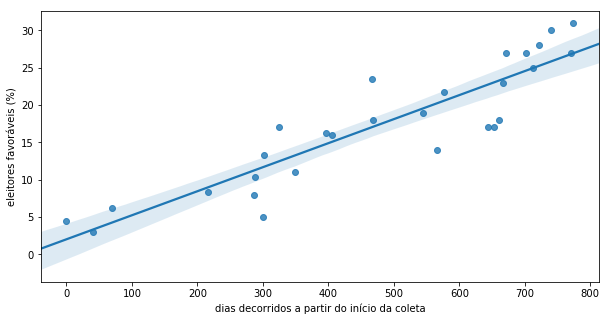

In [70]:
plt.figure(figsize=(10, 5))
ax = sns.regplot(x=df6_7['Delta'], y=df6_7['Dilma'], data=df6_7, ci=95)
ax.set_ylabel('eleitores favoráveis (%)')
ax.set_xlabel('dias decorridos a partir do início da coleta')
plt.show()

#### Resultado da regressão do Serra:

In [71]:
results = ols('Serra ~ Delta', data=df6_7).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Serra   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     7.670
Date:                Wed, 29 May 2019   Prob (F-statistic):             0.0102
Time:                        19:50:27   Log-Likelihood:                -72.183
No. Observations:                  28   AIC:                             148.4
Df Residuals:                      26   BIC:                             151.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5134      1.454     28.558      0.0

#### Gráfico de dispersão do Serra:

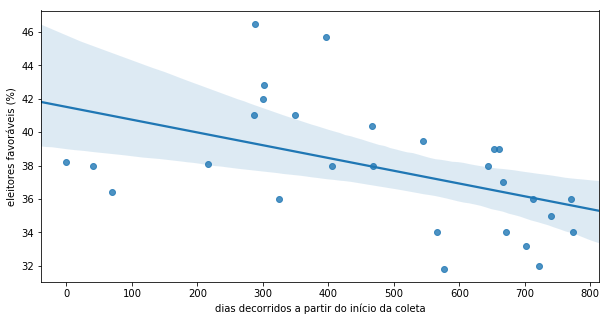

In [72]:
plt.figure(figsize=(10, 5))
ax = sns.regplot(x=df6_7['Delta'], y=df6_7['Serra'], data=df6_7, ci=95)
ax.set_ylabel('eleitores favoráveis (%)')
ax.set_xlabel('dias decorridos a partir do início da coleta')
plt.show()

### b) Especifique um modelo polinomial de segundo grau, homocedástico, que represente a variação da preferência eleitoral de cada candidato ao longo do tempo

$$
y_{ij}=\alpha + \beta x_i + \gamma x_i^2 + e_{ij}
$$

onde:

$y_{ij}$: proporção de eleitores favoráveis do candidato $j$ da $i$-ésima coleta de dados.

$x_i$: número de dias decorridos do início da coleta até o $i$-ésima coleta de dados. 

$e_{ij}$: diferença entre o valor observado e a valor esperado da proporção de eleitores favoráveis do candidato $j$ na $i$-ésima coleta de dados, supondo distribuição Normal com média 0 e variância $\sigma^2$.

### c) Ajuste o modelo especificado no item anterior

#### Ajustando o modelo polinomial de segundo grau para Dilma:

In [73]:
results = ols('Dilma ~ Delta + I(Delta**2)', data=df6_7).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Dilma   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     58.82
Date:                Wed, 29 May 2019   Prob (F-statistic):           3.52e-10
Time:                        19:50:28   Log-Likelihood:                -73.830
No. Observations:                  28   AIC:                             153.7
Df Residuals:                      25   BIC:                             157.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8955      2.289      1.702

#### Gráfico de dispersão da Dilma com modelo polinomial de segundo grau:

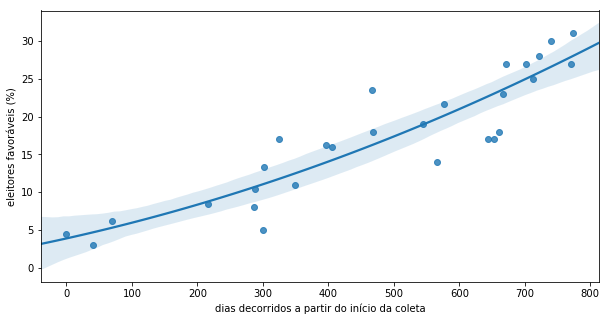

In [74]:
plt.figure(figsize=(10, 5))
ax = sns.regplot(x=df6_7['Delta'], y=df6_7['Dilma'], data=df6_7, ci=95, order=2)
ax.set_ylabel('eleitores favoráveis (%)')
ax.set_xlabel('dias decorridos a partir do início da coleta')
plt.show()

#### Ajustando o modelo polinomial de segundo grau para Serra:

In [75]:
results = ols('Serra ~ Delta + I(Delta**2)', data=df6_7).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Serra   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     9.201
Date:                Wed, 29 May 2019   Prob (F-statistic):            0.00101
Time:                        19:50:28   Log-Likelihood:                -68.080
No. Observations:                  28   AIC:                             142.2
Df Residuals:                      25   BIC:                             146.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        37.5609      1.864     20.153

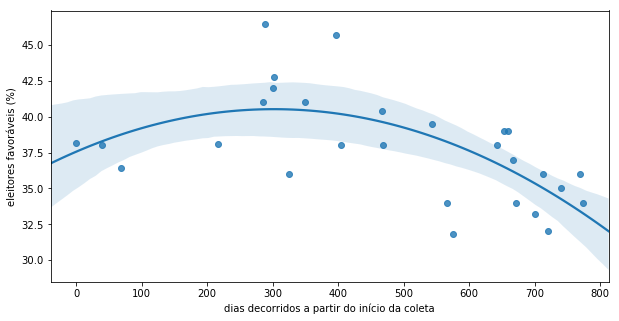

In [76]:
plt.figure(figsize=(10, 5))
ax = sns.regplot(x=df6_7['Delta'], y=df6_7['Serra'], data=df6_7, ci=95, order=2)
ax.set_ylabel('eleitores favoráveis (%)')
ax.set_xlabel('dias decorridos a partir do início da coleta')
plt.show()

<hr>

# Questão 6.16

In [77]:
xls = 'profilaxia.xlsx'
url = 'http://www.ime.usp.br/~jmsinger/MorettinSinger/profilaxia.xls'
df6_16 = pd.read_excel(xls)
attr = list(df6_16)
print(attr)

['Bochecho', 0, 5, 10, 15, 30, 45, 60]


### Visualizando o DataFrame:

In [78]:
df6_16

Bochecho    0    5   10   15   30   45   60
0     Antes  6.3  6.2  6.0  5.8  5.5  5.3  5.1
1     Antes  6.7  6.5  6.4  6.4  6.2  6.2  5.9
2     Antes  6.3  6.3  6.2  6.3  5.9  5.7  5.5
3     Antes  6.2  6.1  5.9  5.8  5.6  5.4  5.2
4     Antes  6.6  6.5  6.5  6.4  6.2  6.1  5.9
5     Antes  6.2  5.8  5.7  5.5  5.2  5.1  5.0
6     Antes  6.4  6.3  6.2  6.1  6.0  5.9  5.8
7     Antes  6.5  6.3  6.1  6.0  5.9  5.7  5.5
8     Antes  6.4  6.3  6.3  6.2  6.1  6.1  6.0
9     Antes  6.4  6.2  6.1  5.9  5.8  5.7  5.5
10    Antes  6.2  6.1  5.9  5.9  5.7  5.6  5.4
11    Antes  6.2  5.9  5.7  5.5  5.2  5.1  5.0
12    Antes  6.5  6.3  6.1  6.0  5.9  5.7  5.6
13    Antes  6.3  6.0  5.7  5.6  5.2  5.1  4.9
14    Antes  6.5  6.0  6.3  6.2  6.1  5.9  5.9
15    Antes  6.5  6.2  6.2  6.0  5.9  5.7  5.7
16    Antes  6.3  6.2  6.1  5.9  5.8  5.7  5.6
17    Antes  6.5  6.3  6.2  6.0  5.8  5.7  5.7
18    Antes  6.7  6.6  6.5  6.3  6.2  6.1  6.1
19    Antes  6.6  6.1  5.8  5.6  5.4  5.3  5.3
20    Antes  6.6  6.4  6.3  6.3  6.3  6.2  6.2
21   Depois  6.4  6.3  6.1  5.9  5.6  5.4  5.2
22   Depois  6.3  6.1  6.0  5.9  5.7  5.5  5.3
23   Depois  6.4  6.1  5.9  5.8  5.4  5.1  5.0
24   Depois  6.3  6.0  5.9  5.8  5.4  5.2  5.1
25   Depois  6.2  6.1  6.0  5.9  5.7  5.4  5.3
26   Depois  6.3  6.0  5.9  5.8  5.5  5.3  5.2
27   Depois  6.4  6.2  6.0  5.9  5.6  5.3  5.1
28   Depois  6.7  6.3  6.2  6.1  5.8  5.6  5.4
29   Depois  6.3  6.1  6.0  5.9  5.7  5.5  5.3
30   Depois  6.3  5.9  5.6  5.5  5.2  5.0  4.9
31   Depois  6.3  6.2  6.1  6.0  5.8  5.6  5.5
32   Depois  6.4  6.0  5.8  5.6  5.2  5.0  4.9
33   Depois  6.4  6.2  6.0  5.8  5.5  5.3  5.2
34   Depois  6.5  6.4  6.3  6.1  6.0  5.7  5.7
35   Depois  6.3  6.0  5.7  5.6  5.3  5.1  5.0
36   Depois  6.3  6.0  5.9  5.7  5.4  5.2  5.0
37   Depois  6.4  5.9  5.7  5.5  5.2  5.5  4.9
38   Depois  6.3  6.0  5.8  5.7  5.4  5.2  5.1
39   Depois  5.9  5.8  5.6  5.5  5.4  5.2  5.1
40   Depois  6.4  6.0  5.7  5.5  5.1  4.8  4.7
41   Depois  6.4  6.2  6.0  5.9  5.6  5.5  5.4

### Separando o DataFrame em Antes e Depois:

In [79]:
antes = df6_16[df6_16['Bochecho'] == 'Antes']
depois = df6_16[df6_16['Bochecho'] == 'Depois']

### Matriz de Covariâncias:

#### Antes:

In [80]:
antes.cov()

0         5         10        15        30        45        60
0   0.026905  0.024024  0.029381  0.029857  0.038881  0.040976  0.045452
5   0.024024  0.039619  0.042405  0.047286  0.056405  0.058881  0.057762
10  0.029381  0.042405  0.061476  0.067071  0.081476  0.083595  0.086190
15  0.029857  0.047286  0.067071  0.080286  0.093571  0.095714  0.094929
30  0.038881  0.056405  0.081476  0.093571  0.118476  0.121095  0.124690
45  0.040976  0.058881  0.083595  0.095714  0.121095  0.127619  0.130738
60  0.045452  0.057762  0.086190  0.094929  0.124690  0.130738  0.142476

#### Depois:

In [81]:
depois.cov()

0         5         10        15      30        45        60
0   0.020571  0.014143  0.014857  0.012857  0.0080  0.008786  0.006429
5   0.014143  0.022286  0.026214  0.025214  0.0275  0.021571  0.025357
10  0.014857  0.026214  0.035286  0.034786  0.0395  0.032929  0.036643
15  0.012857  0.025214  0.034786  0.036619  0.0420  0.034095  0.039143
30  0.008000  0.027500  0.039500  0.042000  0.0550  0.046500  0.052500
45  0.008786  0.021571  0.032929  0.034095  0.0465  0.053476  0.047214
60  0.006429  0.025357  0.036643  0.039143  0.0525  0.047214  0.054571

<hr>

# Questão 6.17

In [82]:
xls = 'esforco.xlsx'
url = 'http://www.ime.usp.br/~jmsinger/MorettinSinger/esforco.xls'
df6_17 = pd.read_excel(xls, sheet_name='dados', skiprows=2)
attr = list(df6_17)
print(attr)

['Ident', 'Iniciais', 'Etiologia', 'Sexo', 'espirométrico', '(anos)', '(cm)', '(kg)', 'corporal', '1o.ERGOESP. (kg/m2)', 'NYHA', 'WEBER', '(bpm)', 'ml/kg/min', '(VCO2/VO2)', '(ml/bpm)', 'VE/VO2 ', 'VE/VCO2 ', 'carga minuto (W)', 'MÁXIMO', 'CARGA', '%MAX', '(bpm).1', 'ml/kg/min.1', '%MAX.1', '(VCO2/VO2).1', '%MAX.2', '(ml/bpm).1', '%MAX.3', 'VE/VO2 .1', '%MAX.4', 'VE/VCO2 .1', '%MAX.5', 'CARGA.1', '%MAX.6', '(bpm).2', 'ml/kg/min.2', '%MAX.7', '(VCO2/VO2).2', '%MAX.8', '(ml/bpm).2', '%MAX.9', 'VE/VO2 .2', '%MAX.10', 'VE/VCO2 .2', '%MAX.11', 'CARGA.2', '(bpm).3', 'ml/kg/min.3', '(VCO2/VO2).3', '(ml/bpm).3', 'VE/VO2 .3', 'VE/VCO2 .3', 'RAMPA', 'VO2 /   WR', 'VE / VCO2', 'Óbito', 'ptes.não obito.', 'Unnamed: 58']


### Visualizando o DataFrame:

In [109]:
df6_17[40:45].head()


Ident Iniciais Etiologia Sexo espirométrico  (anos)   (cm)  (kg)  \
40     41      AFB        ID    M      15.07.91      46  166.0  67.0   
41     42       AC        CH    M      03.07.91      30  173.0  69.0   
42     43      JNC        CH    M      03.07.91      54  164.0  72.0   
43     44     JCNC        ID    M      22.07.91      60  174.0  85.0   
44     45      SFL        CH    M      20.02.91      39  158.0  61.0   

    corporal  1o.ERGOESP. (kg/m2)  ...  (VCO2/VO2).3 (ml/bpm).3  VE/VO2 .3  \
40      1.75                16.72  ...          1.33      10.00       88.6   
41      1.83                23.07  ...          1.27      15.40       38.5   
42      1.79                26.86  ...          1.17      10.40       45.7   
43      2.00                28.14  ...          1.10       7.80       47.0   
44      1.61                24.49  ...          1.25      10.23       38.4   

    VE/VCO2 .3  RAMPA  VO2 /   WR  VE / VCO2     Óbito  ptes.não obito.  \
40        66.7     14     5.93221      62.32      1991              NaN   
41        30.4     15     9.85018      26.64  24.06.91              NaN   
42        39.2     12     5.67866      37.23       Não         24.09.92   
43        42.8     11     5.00453      41.65  26.09.95              NaN   
44        30.8      9     9.10499      25.55       Não         15.12.97   

                            Unnamed: 58  
40                                  Não  
41                                  Não  
42                                  Não  
43  Sim (CMP - 07-93 e TX em 24-09-95).  
44                                  Não  

[5 rows x 59 columns]

### Selecionando as variáveis para análise:

In [84]:
an_df = df6_17[['ml/kg/min.3', 'CARGA.2', 'NYHA', '(bpm).3', '(VCO2/VO2).3', '(kg)', 'Sexo', '(anos)']]
an_df.columns = ['C_O2', 'C_E', 'NYHA', 'F_C', 'R_T_R', 'Peso', 'Sexo', 'Idade']
an_df.head()

C_O2  C_E  NYHA  F_C  R_T_R  Peso Sexo  Idade
0  14.1   71     2  118   1.26  54.0    M     38
1  16.3   91     1  113   1.09  80.0    M     49
2   9.9   37     2  148   1.10  56.0    F     65
3  17.7  127     2  144   1.34  78.0    M     52
4  10.8   43     4  107   1.06  59.0    F     52

### Removendo valores inválidos:

In [85]:
an_df = an_df.replace(to_replace='.', value=np.nan)
an_df = an_df.dropna(axis='index', how='any')
an_df['Sexo'] = np.where(an_df['Sexo'] == 'F', 0, 1)
an_df.head()

C_O2    C_E  NYHA  F_C  R_T_R  Peso  Sexo  Idade
0  14.1   71.0     2  118   1.26  54.0     1     38
1  16.3   91.0     1  113   1.09  80.0     1     49
2   9.9   37.0     2  148   1.10  56.0     0     65
3  17.7  127.0     2  144   1.34  78.0     1     52
4  10.8   43.0     4  107   1.06  59.0     0     52

### a) Construir gráficos de dispersão convenientes

#### Visualizando gráficos de dispersão das variáveis explicativas qualitativas:

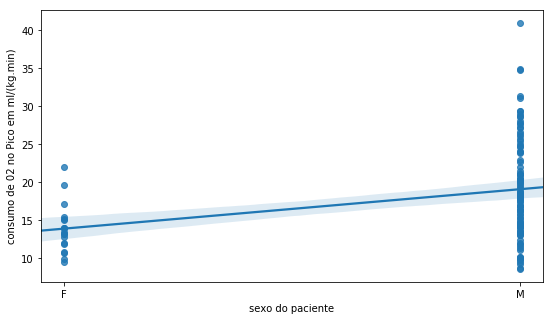

In [86]:
plt.figure(figsize=(9, 5))
ax = sns.regplot(x=an_df['Sexo'], y=an_df['C_O2'], data=df6_5, ci=95)
ax.set_ylabel('consumo de 02 no Pico em ml/(kg.min)')
ax.set_xticks([0, 1])
ax.set_xticklabels(['F', 'M'])
ax.set_xlabel('sexo do paciente')
plt.show()

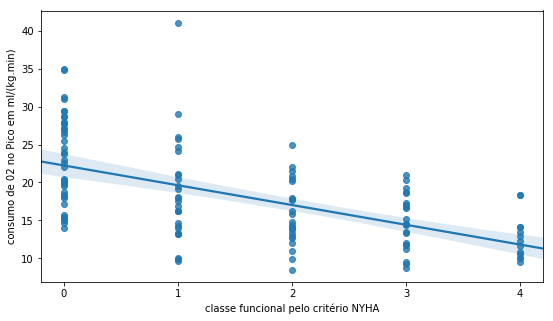

In [87]:
plt.figure(figsize=(9, 5))
ax = sns.regplot(x=an_df['NYHA'], y=an_df['C_O2'], data=df6_5, ci=95)
ax.set_ylabel('consumo de 02 no Pico em ml/(kg.min)')
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xlabel('classe funcional pelo critério NYHA')
plt.show()

#### Visualizando gráficos de dispersão das variáveis explicativas quantitativas:

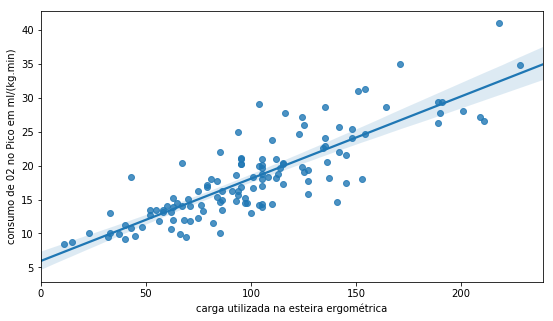

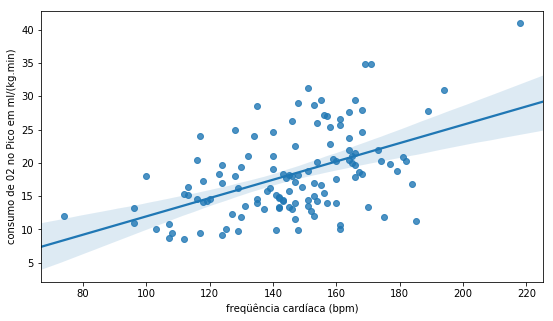

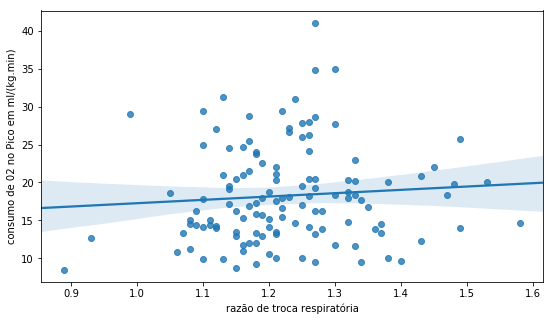

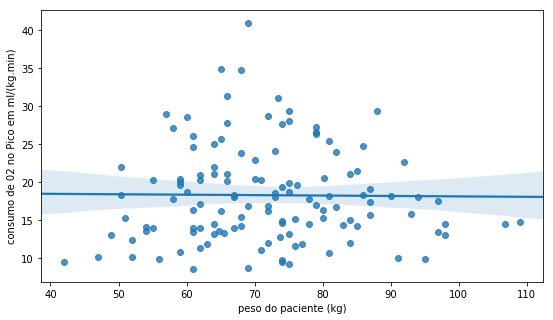

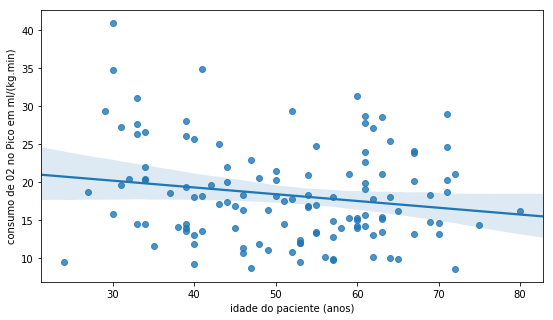

In [88]:
columns = {
    'C_E': 'carga utilizada na esteira ergométrica', 
    'F_C': 'freqüência cardíaca (bpm)', 
    'R_T_R': 'razão de troca respiratória', 
    'Peso': 'peso do paciente (kg)', 
    'Idade': 'idade do paciente (anos)'
}
for column in columns.keys():
    plt.figure(figsize=(9, 5))
    ax = sns.regplot(x=an_df[column], y=an_df['C_O2'], data=df6_5, ci=95)
    ax.set_ylabel('consumo de 02 no Pico em ml/(kg.min)')
    ax.set_xlabel(columns[column])
    plt.show()

### c) Estimar os parâmetros do modelo e apresentar os respectivos erros padrões

In [89]:
columns = ['C_E', 'NYHA', 'F_C', 'R_T_R', 'Peso', 'Sexo', 'Idade']
for column in columns:
    results = ols('C_O2 ~ {}'.format(column), data=an_df).fit()
    print(column)
    print(results.summary())
    print('*' * 80)

C_E
                            OLS Regression Results                            
Dep. Variable:                   C_O2   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     301.9
Date:                Wed, 29 May 2019   Prob (F-statistic):           6.60e-35
Time:                        19:50:32   Log-Likelihood:                -329.93
No. Observations:                 125   AIC:                             663.9
Df Residuals:                     123   BIC:                             669.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9538      0.771      7.719     

### d) Avaliar a qualidade de ajuste do modelo por meio de gráficos de diagnóstico (resíduos, QQ, distância de Cook, etc)

#### Gráfico de Resíduos

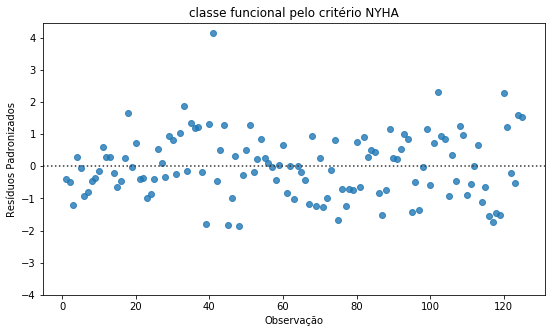

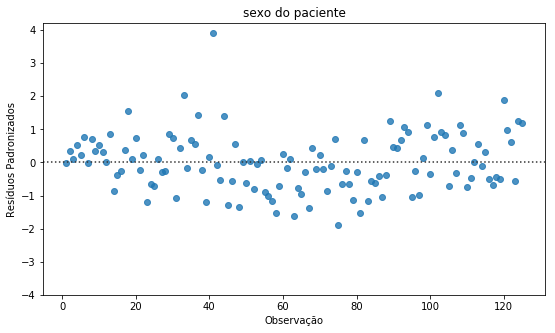

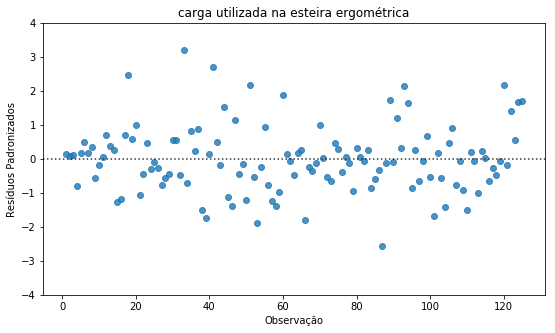

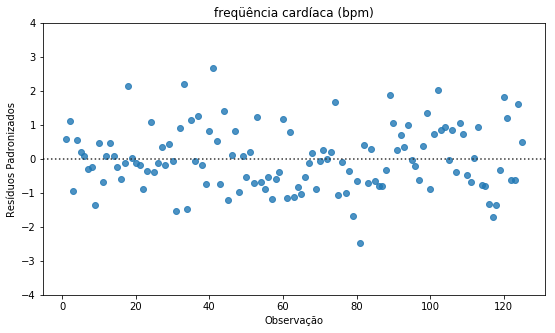

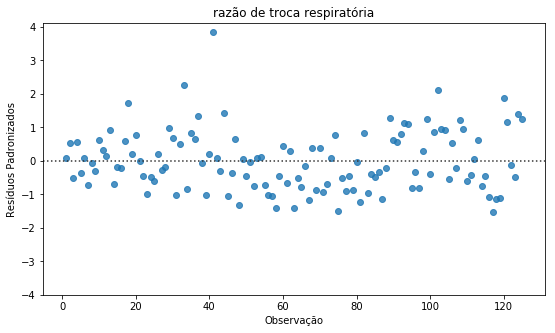

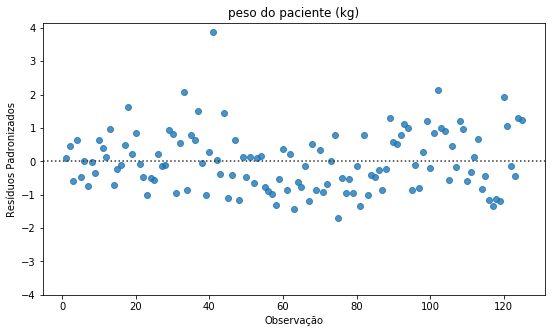

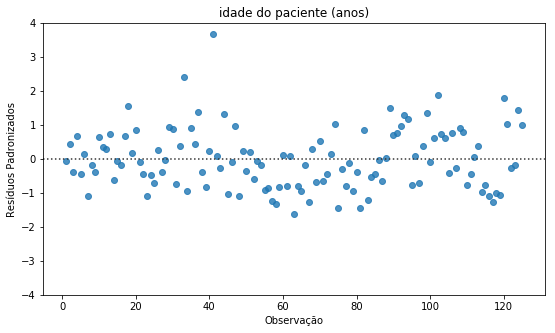

In [90]:
columns = {
    'NYHA': 'classe funcional pelo critério NYHA',
    'Sexo': 'sexo do paciente',
    'C_E': 'carga utilizada na esteira ergométrica', 
    'F_C': 'freqüência cardíaca (bpm)', 
    'R_T_R': 'razão de troca respiratória', 
    'Peso': 'peso do paciente (kg)', 
    'Idade': 'idade do paciente (anos)'
}

for column in columns.keys():
    results = ols('C_O2 ~ {}'.format(column), data=an_df).fit()
    residual = results.get_influence().resid_studentized_internal
    sample = np.arange(1, len(an_df)+1, 1)
    plt.figure(figsize=(9, 5))
    sns.residplot(sample, residual)
    plt.title(columns[column])
    plt.xlabel('Observação')
    plt.ylabel('Resíduos Padronizados')
    plt.yticks(scale)
    plt.show()

#### Gráfico QQ:

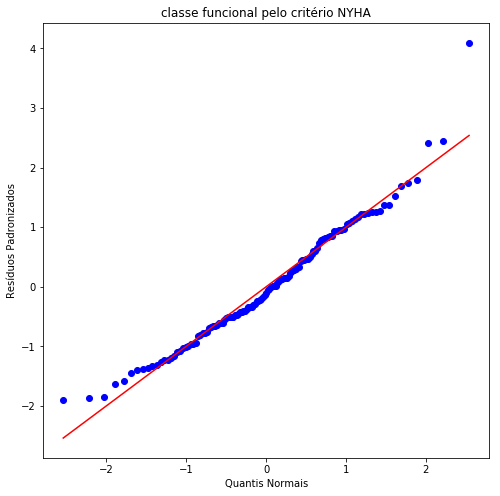

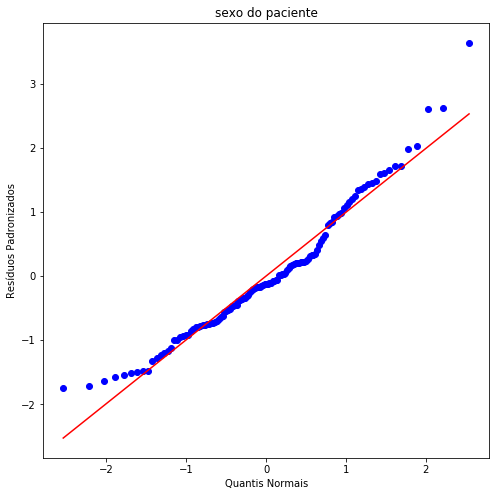

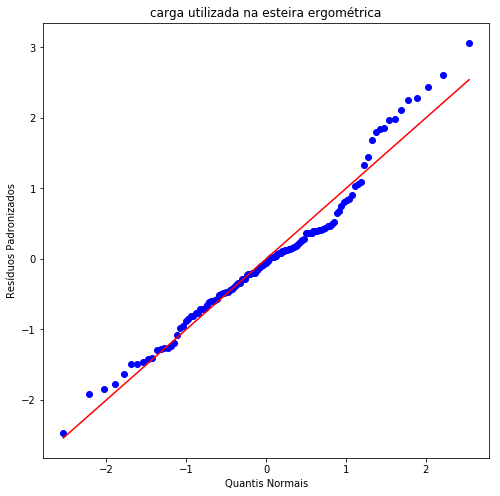

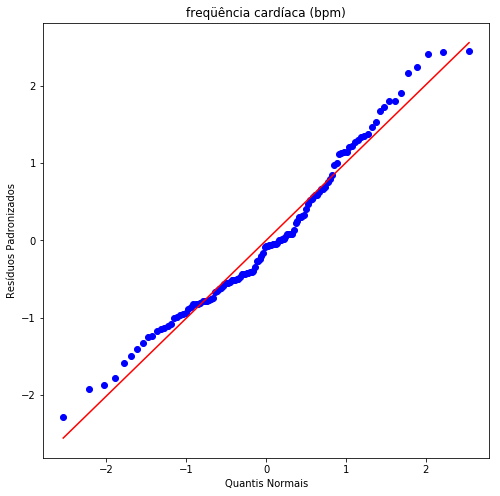

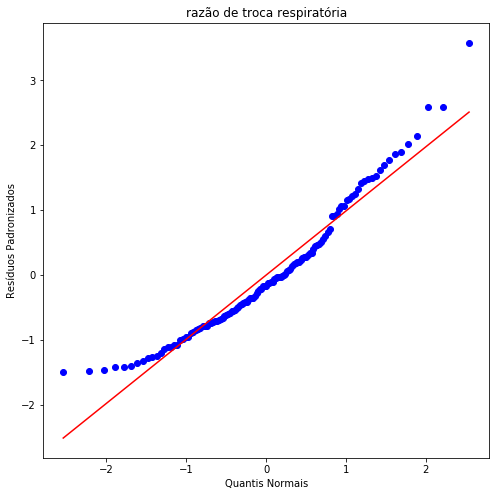

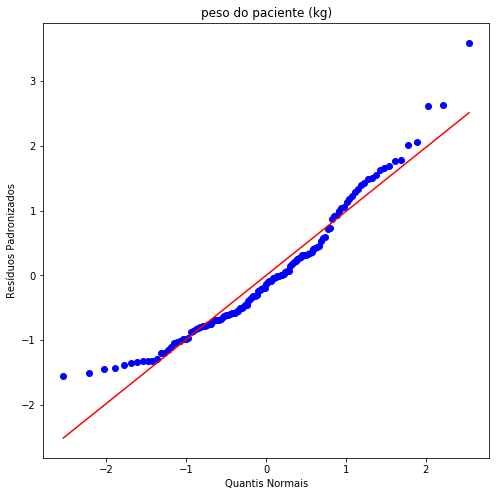

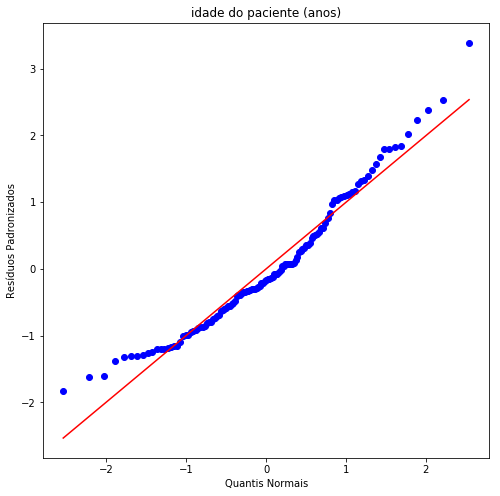

In [91]:
for column in columns.keys():
    results = ols('C_O2 ~ {}'.format(column), data=an_df).fit()
    residual = results.get_influence().resid_studentized_internal
    sample = np.arange(1, len(an_df)+1, 1)
    plt.figure(figsize=(8, 8))
    stats.probplot(residual, plot=plt)
    plt.xlabel('Quantis Normais')
    plt.ylabel('Resíduos Padronizados')
    plt.title(columns[column])
    plt.show()

#### Gráfico de Cook:

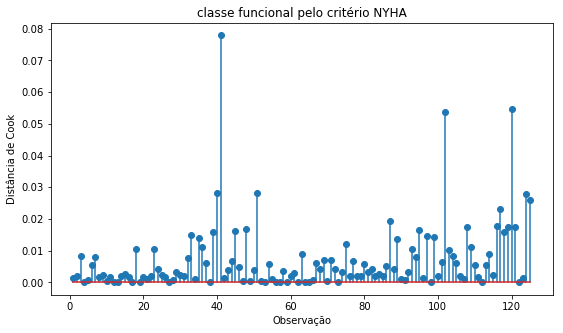

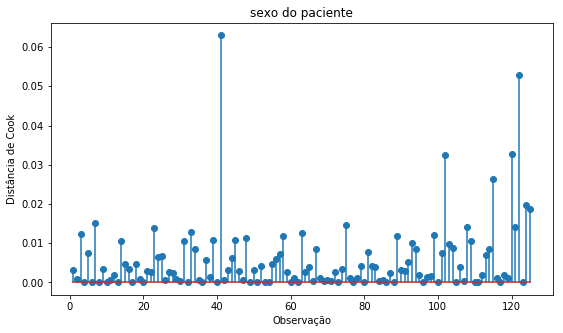

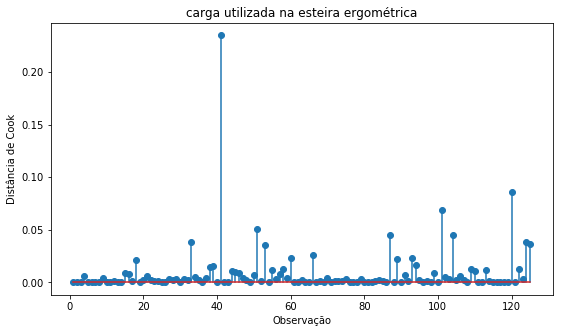

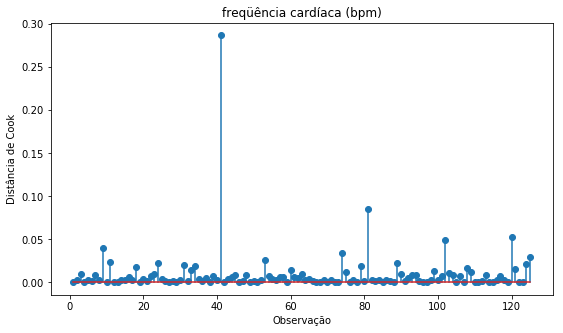

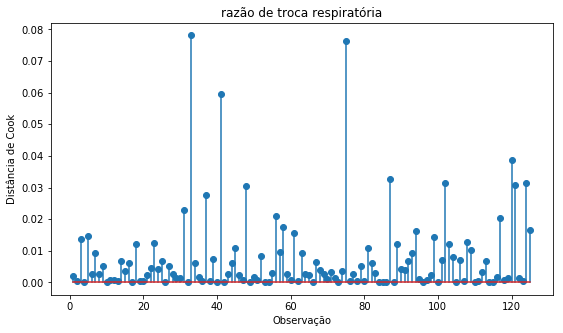

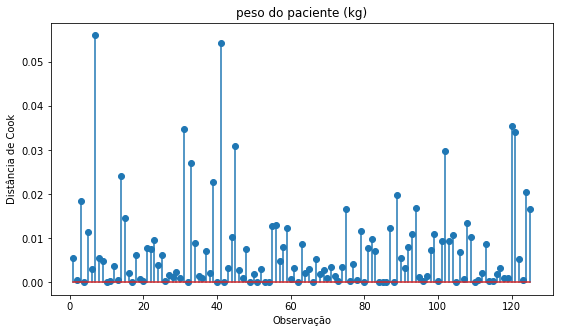

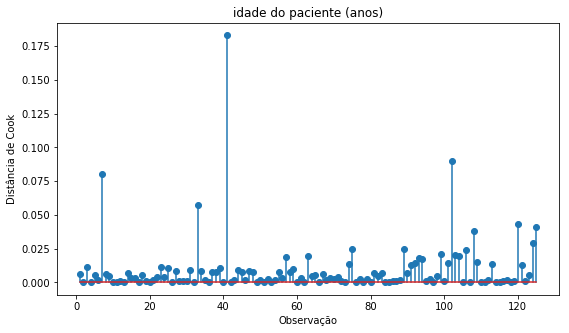

In [92]:
for column in columns.keys():
    results = ols('C_O2 ~ {}'.format(column), data=an_df).fit()
    c, p = results.get_influence().cooks_distance
    sample = np.arange(1, len(c)+1, 1)
    plt.figure(figsize=(9, 5))
    plt.xlabel('Observação')
    plt.ylabel('Distância de Cook')
    plt.title(columns[column])
    plt.stem(sample, c)
    plt.show()

### e) Identificar as variáveis significativas

In [93]:
for column in columns.keys():
    results = ols('C_O2 ~ {}'.format(column), data=an_df).fit()
    print('{0}: {1:.3f}'.format(columns[column], results.rsquared))

classe funcional pelo critério NYHA: 0.319
sexo do paciente: 0.088
carga utilizada na esteira ergométrica: 0.711
freqüência cardíaca (bpm): 0.248
razão de troca respiratória: 0.006
peso do paciente (kg): 0.000
idade do paciente (anos): 0.032


### f) Reajustar o modelo com base nas conclusões do item (e) e avaliar o seu ajuste

É possível perceber que as três variáveis significativas de acordo com o coeficiente de determinação são:
- classe funcional pelo critério NYHA
- carga utilizada na esteira ergométrica
- freqüência cardíaca

In [94]:
results = ols('C_O2 ~ NYHA + C_E + F_C', data=an_df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   C_O2   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     121.5
Date:                Wed, 29 May 2019   Prob (F-statistic):           2.41e-36
Time:                        19:50:41   Log-Likelihood:                -320.58
No. Observations:                 125   AIC:                             649.2
Df Residuals:                     121   BIC:                             660.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2774      2.020      1.127      0.2

#### Gráfico de Resíduos:

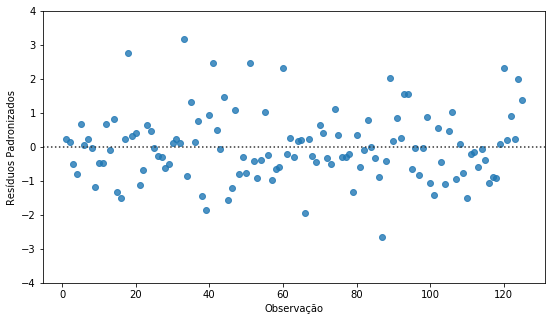

In [95]:
residual = results.get_influence().resid_studentized_internal
sample = np.arange(1, len(an_df)+1, 1)
plt.figure(figsize=(9, 5))
sns.residplot(sample, residual)
plt.xlabel('Observação')
plt.ylabel('Resíduos Padronizados')
plt.yticks(scale)
plt.show()

#### Gráfico QQ:

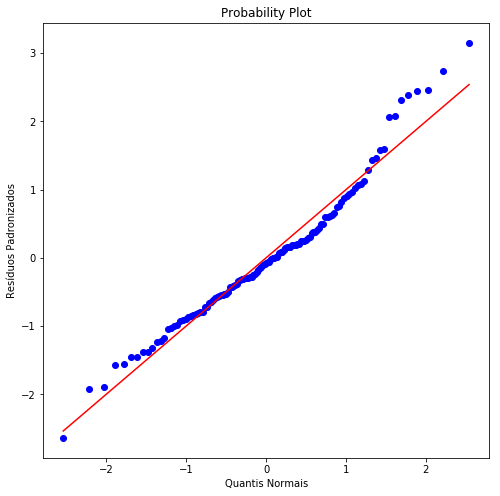

In [96]:
plt.figure(figsize=(8, 8))
stats.probplot(residual, plot=plt)
plt.xlabel('Quantis Normais')
plt.ylabel('Resíduos Padronizados')
plt.show()

#### Gráfico de Cook:

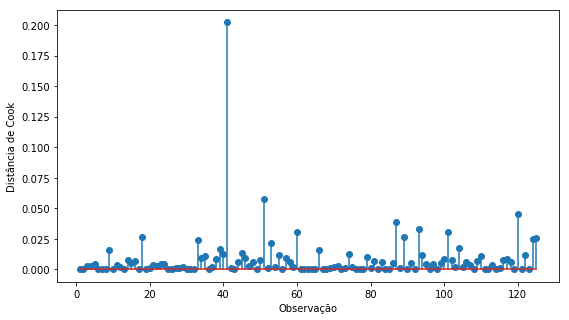

In [97]:
c, p = results.get_influence().cooks_distance
plt.figure(figsize=(9, 5))
plt.xlabel('Observação')
plt.ylabel('Distância de Cook')
plt.stem(sample, c)
plt.show()